# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from datetime import datetime, timedelta
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi.newsapi_client import NewsApiClient
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/patriciarajamanickam/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!

Bad key "text.kerning_factor" on line 4 in
/usr/local/anaconda3/envs/nlpenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Read your api key environment variable
load_dotenv()

# Set News API Key
api_key=os.environ["NEWS_API_KEY"]

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key)
newsapi

In [4]:
def get_news_articles(keyword):
    article_en = newsapi.get_everything(q=keyword,language="en")
        
    return article_en

In [5]:
# Fetch the Bitcoin news articles
btc_news_articles = get_news_articles("bitcoin")

In [6]:
# Display the Bitcoin News Article
btc_news_articles

{'status': 'ok',
 'totalResults': 9825,
 'articles': [{'source': {'id': 'wired', 'name': 'Wired'},
   'author': 'Arielle Pardes',
   'title': 'Miami’s Bitcoin Conference Left a Trail of Harassment',
   'description': 'For some women, inappropriate conduct from other conference-goers continued to haunt them online.',
   'url': 'https://www.wired.com/story/bitcoin-2022-conference-harassment/',
   'urlToImage': 'https://media.wired.com/photos/627a89e3e37e715cb7d760d2/191:100/w_1280,c_limit/Bitcoin_Miami_Biz_GettyImages-1239817123.jpg',
   'publishedAt': '2022-05-10T16:59:46Z',
   'content': 'Now, even though there are a number of women-focused crypto spaces, Odeniran says women are still underrepresented. Ive been in spaces where Im the only Black person, or the only woman, or the only B… [+3828 chars]'},
  {'source': {'id': 'the-verge', 'name': 'The Verge'},
   'author': 'Justine Calma',
   'title': 'Why fossil fuel companies see green in Bitcoin mining projects',
   'description': 'Exxo

In [7]:
print(btc_news_articles["totalResults"])

9825


In [8]:
# Fetch the Ethereum news articles
eth_news_articles = get_news_articles("ethereum")

In [9]:
print(eth_news_articles["totalResults"])

4612


In [10]:
# Sentiment calculation based on compound score
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

In [11]:
# Sentiment scores dictionaries

def create_df(news, language):
    """
    Create the dataframe from the News articles.
    This function is modularized with language parmeter to obtain News artcile of certain language as needed.
    """
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "language": language
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

def get_sentiment_scores(news_articles_df):
    """
    Calculates the sentiment for the key fields in the News article such as Title, Text and Description.
    This function returns New article dataframe containing the News and Sentiment scores. 
    """
    title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
    }
    
    text_sent = {
        "text_compound": [],
        "text_pos": [],
        "text_neu": [],
        "text_neg": [],
        "text_sent": [],
    }
    
    desc_sent = {
        "desc_compound": [],
        "desc_pos": [],
        "desc_neu": [],
        "desc_neg": [],
        "desc_sent": [],
    }

    # Get sentiment for the text and the title
    for index, row in news_articles_df.iterrows():
        try:
            # Sentiment scoring with VADER
            title_sentiment = analyzer.polarity_scores(row["title"])
            title_sent["title_compound"].append(title_sentiment["compound"])
            title_sent["title_pos"].append(title_sentiment["pos"])
            title_sent["title_neu"].append(title_sentiment["neu"])
            title_sent["title_neg"].append(title_sentiment["neg"])
            title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

            text_sentiment = analyzer.polarity_scores(row["text"])
            text_sent["text_compound"].append(text_sentiment["compound"])
            text_sent["text_pos"].append(text_sentiment["pos"])
            text_sent["text_neu"].append(text_sentiment["neu"])
            text_sent["text_neg"].append(text_sentiment["neg"])
            text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
            
            desc_sentiment = analyzer.polarity_scores(row["description"])
            desc_sent["desc_compound"].append(desc_sentiment["compound"])
            desc_sent["desc_pos"].append(desc_sentiment["pos"])
            desc_sent["desc_neu"].append(desc_sentiment["neu"])
            desc_sent["desc_neg"].append(desc_sentiment["neg"])
            desc_sent["desc_sent"].append(get_sentiment(desc_sentiment["compound"]))
            
        except AttributeError:
            pass

    # Attaching sentiment columns to the News DataFrame
    title_sentiment_df = pd.DataFrame(title_sent)
    text_sentiment_df = pd.DataFrame(text_sent)
    desc_sentiment_df = pd.DataFrame(desc_sent)
    news_articles_df = news_articles_df.join(title_sentiment_df).join(text_sentiment_df).join(desc_sentiment_df)
    
    return news_articles_df.dropna(how="any")



In [12]:
# Create the Bitcoin sentiment scores DataFrame
btc_news_df = create_df(btc_news_articles["articles"], "en")
btc_sentiment_scores = get_sentiment_scores(btc_news_df)
btc_sentiment_scores 

,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent,desc_compound,desc_pos,desc_neu,desc_neg,desc_sent
0,Miami’s Bitcoin Conference Left a Trail of Har...,"For some women, inappropriate conduct from oth...","Now, even though there are a number of women-f...",2022-05-10,en,-0.5423,0.000,0.632,0.368,-1,0.0772,0.036,0.964,0.000,1,-0.4019,0.000,0.816,0.184,-1
1,Why fossil fuel companies see green in Bitcoin...,ExxonMobil and other fossil fuel companies hav...,A Bitcoin mining site powered by otherwise los...,2022-05-04,en,0.0000,0.000,1.000,0.000,0,-0.0516,0.056,0.882,0.061,-1,-0.5423,0.000,0.809,0.191,-1
2,Warren Buffett Says He Wouldn't Take All the B...,Warren Buffett has always been a bitcoin skept...,Warren Buffett has always been a bitcoin skept...,2022-05-02,en,0.0000,0.000,1.000,0.000,0,-0.3269,0.085,0.772,0.143,-1,-0.3269,0.069,0.814,0.117,-1
3,Luna Foundation Tried to Prop Up Terra’s Crumb...,"As a kid, I remember when my father tried to u...","As a kid, I remember when my father tried to u...",2022-05-16,en,-0.6652,0.000,0.782,0.218,-1,0.3818,0.114,0.833,0.052,1,0.3818,0.098,0.857,0.045,1
4,Bitcoin value drops by 50% since November peak,The slide in the value of cryptocurrencies com...,"Image source, Getty Images\r\nThe value of Bit...",2022-05-09,en,0.3400,0.255,0.745,0.000,1,0.3400,0.072,0.928,0.000,1,-0.0258,0.121,0.754,0.126,0
5,Fidelity Wants to Include Bitcoin in 401(k) Pl...,The nation's largest retirement plan provider ...,If youve ever felt like introducing some Vegas...,2022-05-05,en,0.0000,0.000,1.000,0.000,0,0.7506,0.193,0.807,0.000,1,0.0000,0.000,1.000,0.000,0
6,US Treasury issues first-ever sanctions agains...,Cryptocurrency mixers are sometimes used to he...,Cryptocurrency mixers are sometimes used to he...,2022-05-06,en,0.2023,0.205,0.795,0.000,1,-0.4404,0.202,0.557,0.241,-1,-0.4404,0.177,0.613,0.211,-1
7,Cryptoverse: rising interest hurts Bitcoin - R...,From Bitcoin's dramatic drop to a new way to p...,Posted \r\nFrom Bitcoin's dramatic drop to a n...,2022-05-10,en,-0.0258,0.297,0.396,0.307,0,-0.3612,0.000,0.877,0.123,-1,-0.3612,0.000,0.873,0.127,-1
8,Bitcoin falls 7.2% to $28758 - Reuters.com,"Bitcoin fell 7.23% to $28,758.29 at 22:05 GMT ...","May 11 (Reuters) - Bitcoin fell 7.23% to $28,7...",2022-05-11,en,0.0000,0.000,1.000,0.000,0,-0.3818,0.000,0.923,0.077,-1,-0.3818,0.000,0.852,0.148,-1
9,Bitcoin last up 5.7% at $39862.84 - Reuters.com,"Bitcoin rose 5.7% to $39,862.84, on Wednesday,...","May 4 (Reuters) - Bitcoin rose 5.7% to $39,862...",2022-05-04,en,0.0000,0.000,1.000,0.000,0,-0.2732,0.000,0.937,0.063,-1,0.0000,0.000,1.000,0.000,0


In [13]:
# Create the Ethereum sentiment scores DataFrame
eth_news_df = create_df(eth_news_articles["articles"], "en")
eth_sentiment_scores = get_sentiment_scores(eth_news_df)
eth_sentiment_scores

,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent,desc_compound,desc_pos,desc_neu,desc_neg,desc_sent
0,Here's what NFTs look like on Instagram,Meta has revealed more of how NFTs will work o...,Meta has revealed more of how NFTs will work o...,2022-05-10,en,0.3612,0.294,0.706,0.000,1,0.6486,0.135,0.865,0.000,1,0.7783,0.154,0.846,0.000,1
1,Yuga Labs apologises after sale of virtual lan...,Demand for plots of land in multiplayer game O...,A multi-billion dollar cryptocurrency company ...,2022-05-02,en,0.2023,0.167,0.833,0.000,1,-0.2263,0.046,0.879,0.075,-1,-0.2350,0.070,0.836,0.093,-1
2,How Bored Ape Yacht Club Broke Ethereum - CNET,"Transactions stalled for hours, and people pai...",When Bored Ape Yacht Club creators Yuga Labs a...,2022-05-04,en,-0.5994,0.000,0.550,0.450,-1,-0.2732,0.000,0.945,0.055,-1,0.2500,0.151,0.753,0.097,1
3,Cryptoverse: Ether prepares for epic 'merge' i...,Ether has promised to do better. It has promis...,April 26 (Reuters) - Ether has promised to do ...,2022-04-26,en,0.0000,0.000,1.000,0.000,0,0.5346,0.142,0.858,0.000,1,0.5346,0.173,0.827,0.000,1
4,What is the Ethereum merge and how could it ma...,Ethereum is preparing for an upgrade that’s be...,Ethereum is preparing for an upgrade thats bee...,2022-04-26,en,0.0000,0.000,1.000,0.000,0,0.2716,0.065,0.935,0.000,1,-0.0018,0.053,0.893,0.054,0
5,Sale of Bored Apes' Metaverse Land Made Gas Fe...,There's a new metaverse project from the creat...,There's a new metaverse project from the creat...,2022-05-01,en,-0.2732,0.000,0.840,0.160,-1,-0.2732,0.000,0.937,0.063,-1,-0.2732,0.000,0.950,0.050,-1
6,Ethereum and Bitcoin Prices Are Tanking. Here’...,<ol><li>Ethereum and Bitcoin Prices Are Tankin...,Editorial IndependenceWe want to help you make...,2022-05-09,en,-0.5106,0.000,0.777,0.223,-1,0.6908,0.178,0.822,0.000,1,-0.8555,0.000,0.743,0.257,-1
7,"Cryptocurrency Markets Drop $200B, Bitcoin Dow...","40 days ago Bitcoin sold for $47,454. It's pri...","40 days ago Bitcoin sold for $47,454. It's pri...",2022-05-09,en,-0.2732,0.000,0.792,0.208,-1,-0.6908,0.000,0.822,0.178,-1,-0.6908,0.000,0.850,0.150,-1
8,"Report: 'Nvidia's LHR Limiter Has Fallen, But ...",Slashdot reader Hmmmmmm shared this report fro...,When Nvidia launched its Ampere Lite Hash Rate...,2022-05-15,en,0.3311,0.242,0.622,0.136,1,-0.3818,0.069,0.847,0.085,-1,-0.0516,0.108,0.823,0.069,-1
9,Bitcoin last up 5.7% at $39862.84 - Reuters.com,"Bitcoin rose 5.7% to $39,862.84, on Wednesday,...","May 4 (Reuters) - Bitcoin rose 5.7% to $39,862...",2022-05-04,en,0.0000,0.000,1.000,0.000,0,-0.2732,0.000,0.937,0.063,-1,0.0000,0.000,1.000,0.000,0


In [14]:
# Describe the Bitcoin Sentiment
btc_sentiment_scores.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent,desc_compound,desc_pos,desc_neu,desc_neg,desc_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.0000,20.000000,20.000000,20.000000
mean,-0.099820,0.061150,0.850750,0.088100,-0.200000,-0.093390,0.059450,0.860050,0.08045,-0.200000,-0.154900,0.0527,0.842500,0.104900,-0.250000
std,0.248886,0.096207,0.169609,0.121448,0.695852,0.389782,0.062439,0.104336,0.07613,1.005249,0.363607,0.0654,0.105399,0.094425,0.850696
min,-0.665200,0.000000,0.396000,0.000000,-1.000000,-0.859300,0.000000,0.557000,0.00000,-1.000000,-0.750600,0.0000,0.613000,0.000000,-1.000000
25%,-0.278900,0.000000,0.743000,0.000000,-1.000000,-0.366350,0.000000,0.827000,0.05350,-1.000000,-0.411525,0.0000,0.812750,0.000000,-1.000000
50%,0.000000,0.000000,0.877000,0.000000,0.000000,-0.190100,0.048000,0.888000,0.06300,-1.000000,-0.176350,0.0000,0.829000,0.119500,-0.500000
75%,0.000000,0.112000,1.000000,0.175000,0.000000,0.152575,0.085000,0.930250,0.08425,1.000000,0.032000,0.1075,0.879000,0.156750,0.250000
max,0.340000,0.297000,1.000000,0.368000,1.000000,0.750600,0.202000,0.964000,0.30000,1.000000,0.541300,0.1770,1.000000,0.351000,1.000000


In [15]:
# Describe the Ethereum Sentiment
eth_sentiment_scores.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent,desc_compound,desc_pos,desc_neu,desc_neg,desc_sent
count,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,-0.044865,0.052400,0.875650,0.07195,-0.100000,-0.029180,0.045900,0.904800,0.049450,-0.250000,-0.088360,0.056850,0.866450,0.076750,-0.250000
std,0.255589,0.100289,0.145678,0.11939,0.718185,0.402413,0.059923,0.052498,0.043592,0.966546,0.425849,0.072472,0.080915,0.074727,0.850696
min,-0.599400,0.000000,0.550000,0.00000,-1.000000,-0.690800,0.000000,0.822000,0.000000,-1.000000,-0.855500,0.000000,0.743000,0.000000,-1.000000
25%,-0.220025,0.000000,0.773750,0.00000,-1.000000,-0.284450,0.000000,0.858750,0.000000,-1.000000,-0.300350,0.000000,0.821500,0.000000,-1.000000
50%,0.000000,0.000000,0.942000,0.00000,0.000000,-0.189700,0.000000,0.925500,0.059000,-1.000000,-0.038700,0.000000,0.851000,0.062500,-0.500000
75%,0.000000,0.022500,1.000000,0.13850,0.000000,0.288700,0.073000,0.937000,0.069000,1.000000,0.062500,0.111250,0.914750,0.131500,0.250000
max,0.361200,0.294000,1.000000,0.45000,1.000000,0.690800,0.178000,1.000000,0.178000,1.000000,0.778300,0.212000,1.000000,0.257000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the highest mean positive score for title(.061), text(.059) and description(.052) compared to Ethereum (.052),(.045),(.056)

Q: Which coin had the highest compound score?

A: Ethereum had the highest compound score for title(.36) and description(.77) in comparison to Bitcoin. 
Bitcoin got highest compond score of (.75) for text

Q. Which coin had the highest positive score?

A: Bitcoin had the tad bit highest positive score for Title(.297) and text(.20) compared Ethereum. But Ethereum description score is higher for Bitcoin.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [16]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [17]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addons = {'say','though','some','wouldn\'t', 'take','all','also','found','still'}

In [18]:
# Complete the tokenizer function
def tokenizer(text, fun_overide_param):
    """
    Tokenizes the text
    Second parameter is function overide param utilized to get list of tokens from the text 
    or 
    obtain big string of tokens separated by spaces.
    """
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)

    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    if fun_overide_param == 'A':
        return tokens
    else:
        return ' '.join(tokens)

In [19]:
# Create a new tokens column for Bitcoin
btc_title_tokens = [tokenizer(btc_article['title'],'A') for btc_article in btc_news_articles["articles"]]
btc_description_tokens = [tokenizer(btc_article['description'],'A') for btc_article in btc_news_articles["articles"]]
btc_text_tokens = [tokenizer(btc_article['content'],'A') for btc_article in btc_news_articles["articles"]]

# Construct the dataframe with Title, Text and Description tokens from each Bitcoin News.
btc_news_df["title-tokens"]= btc_title_tokens
btc_news_df["description-tokens"]= btc_description_tokens
btc_news_df["text-tokens"]= btc_text_tokens

# Review Bitcoin News Dataframe
btc_news_df.head()

,title,description,text,date,language,title-tokens,description-tokens,text-tokens
0,Miami’s Bitcoin Conference Left a Trail of Har...,"For some women, inappropriate conduct from oth...","Now, even though there are a number of women-f...",2022-05-10,en,"[miamis, bitcoin, conference, left, trail, har...","[woman, inappropriate, conduct, conferencegoer...","[even, number, womenfocused, crypto, space, od..."
1,Why fossil fuel companies see green in Bitcoin...,ExxonMobil and other fossil fuel companies hav...,A Bitcoin mining site powered by otherwise los...,2022-05-04,en,"[fossil, fuel, company, see, green, bitcoin, m...","[exxonmobil, fossil, fuel, company, turned, bi...","[bitcoin, mining, site, powered, otherwise, lo..."
2,Warren Buffett Says He Wouldn't Take All the B...,Warren Buffett has always been a bitcoin skept...,Warren Buffett has always been a bitcoin skept...,2022-05-02,en,"[warren, buffett, says, wouldnt, bitcoin, world]","[warren, buffett, ha, always, bitcoin, skeptic...","[warren, buffett, ha, always, bitcoin, skeptic..."
3,Luna Foundation Tried to Prop Up Terra’s Crumb...,"As a kid, I remember when my father tried to u...","As a kid, I remember when my father tried to u...",2022-05-16,en,"[luna, foundation, tried, prop, terras, crumbl...","[kid, remember, father, tried, use, broom, han...","[kid, remember, father, tried, use, broom, han..."
4,Bitcoin value drops by 50% since November peak,The slide in the value of cryptocurrencies com...,"Image source, Getty Images\r\nThe value of Bit...",2022-05-09,en,"[bitcoin, value, drop, since, november, peak]","[slide, value, cryptocurrencies, come, stock, ...","[image, source, getty, imagesthe, value, bitco..."


In [20]:
# Create a new tokens column for Ethereum
eth_title_tokens = [tokenizer(eth_article['title'],'A') for eth_article in eth_news_articles["articles"]]
eth_description_tokens = [tokenizer(eth_article['description'],'A') for eth_article in eth_news_articles["articles"]]
eth_text_tokens = [tokenizer(eth_article['content'],'A') for eth_article in eth_news_articles["articles"]]

eth_news_df["title-tokens"]= eth_title_tokens
eth_news_df["description-tokens"]= eth_description_tokens
eth_news_df["text-tokens"]= eth_text_tokens

eth_news_df.head()

,title,description,text,date,language,title-tokens,description-tokens,text-tokens
0,Here's what NFTs look like on Instagram,Meta has revealed more of how NFTs will work o...,Meta has revealed more of how NFTs will work o...,2022-05-10,en,"[heres, nfts, look, like, instagram]","[meta, ha, revealed, nfts, work, instagram, us...","[meta, ha, revealed, nfts, work, instagram, us..."
1,Yuga Labs apologises after sale of virtual lan...,Demand for plots of land in multiplayer game O...,A multi-billion dollar cryptocurrency company ...,2022-05-02,en,"[yuga, labs, apologises, sale, virtual, land, ...","[demand, plot, land, multiplayer, game, others...","[multibillion, dollar, cryptocurrency, company..."
2,How Bored Ape Yacht Club Broke Ethereum - CNET,"Transactions stalled for hours, and people pai...",When Bored Ape Yacht Club creators Yuga Labs a...,2022-05-04,en,"[bored, ape, yacht, club, broke, ethereum, cnet]","[transactions, stalled, hour, people, paid, th...","[bored, ape, yacht, club, creator, yuga, labs,..."
3,Cryptoverse: Ether prepares for epic 'merge' i...,Ether has promised to do better. It has promis...,April 26 (Reuters) - Ether has promised to do ...,2022-04-26,en,"[cryptoverse, ether, prepares, epic, merge, qu...","[ether, ha, promised, better, ha, promised, go...","[april, reuters, ether, ha, promised, better, ..."
4,What is the Ethereum merge and how could it ma...,Ethereum is preparing for an upgrade that’s be...,Ethereum is preparing for an upgrade thats bee...,2022-04-26,en,"[ethereum, merge, could, make, crypto, greener]","[ethereum, preparing, upgrade, thats, describe...","[ethereum, preparing, upgrade, thats, describe..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [21]:
from collections import Counter
from nltk import ngrams

In [22]:
# Generate the Bitcoin N-grams where N=2
btc_bigrams = Counter(ngrams([btc_item for btc_text_token in btc_text_tokens for btc_item in btc_text_token], n=2))
print(dict(btc_bigrams))


{('even', 'number'): 1, ('number', 'womenfocused'): 1, ('womenfocused', 'crypto'): 1, ('crypto', 'space'): 1, ('space', 'odeniran'): 1, ('odeniran', 'woman'): 1, ('woman', 'underrepresented'): 1, ('underrepresented', 'ive'): 1, ('ive', 'space'): 1, ('space', 'im'): 1, ('im', 'black'): 1, ('black', 'person'): 1, ('person', 'woman'): 1, ('woman', 'b'): 1, ('b', 'char'): 2, ('char', 'bitcoin'): 1, ('bitcoin', 'mining'): 1, ('mining', 'site'): 1, ('site', 'powered'): 1, ('powered', 'otherwise'): 1, ('otherwise', 'lost'): 1, ('lost', 'gas'): 1, ('gas', 'oil'): 1, ('oil', 'well'): 1, ('well', 'near'): 1, ('near', 'linden'): 1, ('linden', 'texas'): 1, ('texas', 'april'): 1, ('april', 'th'): 1, ('th', 'photo'): 1, ('photo', 'francois'): 1, ('francois', 'picardafp'): 1, ('picardafp', 'via'): 1, ('via', 'getty'): 1, ('getty', 'images'): 1, ('images', 'corporate'): 1, ('corporate', 'climate'): 1, ('climate', 'hype'): 1, ('hype', 'fl'): 1, ('fl', 'char'): 1, ('char', 'warren'): 1, ('warren', 'buff

In [23]:
# Generate the Ethereum N-grams where N=2
eth_bigrams = Counter(ngrams([eth_item for eth_text_token in eth_text_tokens for eth_item in eth_text_token], n=2))
print(dict(eth_bigrams))

{('meta', 'ha'): 1, ('ha', 'revealed'): 1, ('revealed', 'nfts'): 1, ('nfts', 'work'): 1, ('work', 'instagram'): 1, ('instagram', 'usbased'): 1, ('usbased', 'test'): 1, ('test', 'show'): 1, ('show', 'youve'): 1, ('youve', 'bought'): 1, ('bought', 'created'): 1, ('created', 'free'): 1, ('free', 'connecting'): 1, ('connecting', 'instagram'): 1, ('instagram', 'account'): 1, ('account', 'compatible'): 1, ('compatible', 'digital'): 1, ('digital', 'walle'): 1, ('walle', 'char'): 1, ('char', 'multibillion'): 1, ('multibillion', 'dollar'): 1, ('dollar', 'cryptocurrency'): 1, ('cryptocurrency', 'company'): 1, ('company', 'ha'): 1, ('ha', 'apologised'): 1, ('apologised', 'user'): 1, ('user', 'sale'): 1, ('sale', 'metaverse'): 1, ('metaverse', 'land'): 1, ('land', 'sparked'): 1, ('sparked', 'frenzy'): 1, ('frenzy', 'temporarily'): 1, ('temporarily', 'brought'): 1, ('brought', 'ethereum'): 1, ('ethereum', 'cryptocurrencyyuga'): 1, ('cryptocurrencyyuga', 'labs'): 1, ('labs', 'comp'): 1, ('comp', 'ch

In [24]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [25]:
# Use token_count to get the top 10 words for Bitcoin Bigrams
btc_top_10_bigrams = dict(token_count(btc_bigrams,10))
btc_top_10_bigrams

{('reuters', 'bitcoin'): 5,
 ('may', 'reuters'): 4,
 ('previous', 'closebitcoin'): 4,
 ('closebitcoin', 'world'): 4,
 ('world', 'biggest'): 4,
 ('biggest', 'bestknown'): 4,
 ('bestknown', 'cryptocurrency'): 4,
 ('char', 'may'): 3,
 ('b', 'char'): 2,
 ('losing', 'previous'): 2}

In [26]:
# Use token_count to get the top 10 words for Bitcoin
btc_top_10 = dict(token_count([btc_item for btc_text_token in btc_text_tokens for btc_item in btc_text_token],10))
btc_top_10

{'char': 19,
 'bitcoin': 13,
 'cryptocurrency': 13,
 'world': 7,
 'ha': 5,
 'week': 5,
 'reuters': 5,
 'investor': 4,
 'dropped': 4,
 'may': 4}

In [27]:
# Use token_count to get the top 10 words for Ethereum Bigrams
eth_top_10_bigrams = dict(token_count(eth_bigrams,10))
eth_top_10_bigrams

{('reuters', 'bitcoin'): 4,
 ('previous', 'closebitcoin'): 4,
 ('closebitcoin', 'world'): 4,
 ('world', 'biggest'): 4,
 ('biggest', 'bestknown'): 4,
 ('bestknown', 'cryptocurrency'): 4,
 ('char', 'may'): 3,
 ('may', 'reuters'): 3,
 ('yacht', 'club'): 2,
 ('char', 'april'): 2}

In [28]:
# Use token_count to get the top 10 words for Ethereum
eth_top_10 = dict(token_count([eth_item for eth_text_token in eth_text_tokens for eth_item in eth_text_token],10))
eth_top_10

{'char': 20,
 'cryptocurrency': 10,
 'bitcoin': 8,
 'ha': 7,
 'world': 7,
 'may': 6,
 'ethereum': 5,
 'biggest': 5,
 'reuters': 5,
 'last': 5}

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

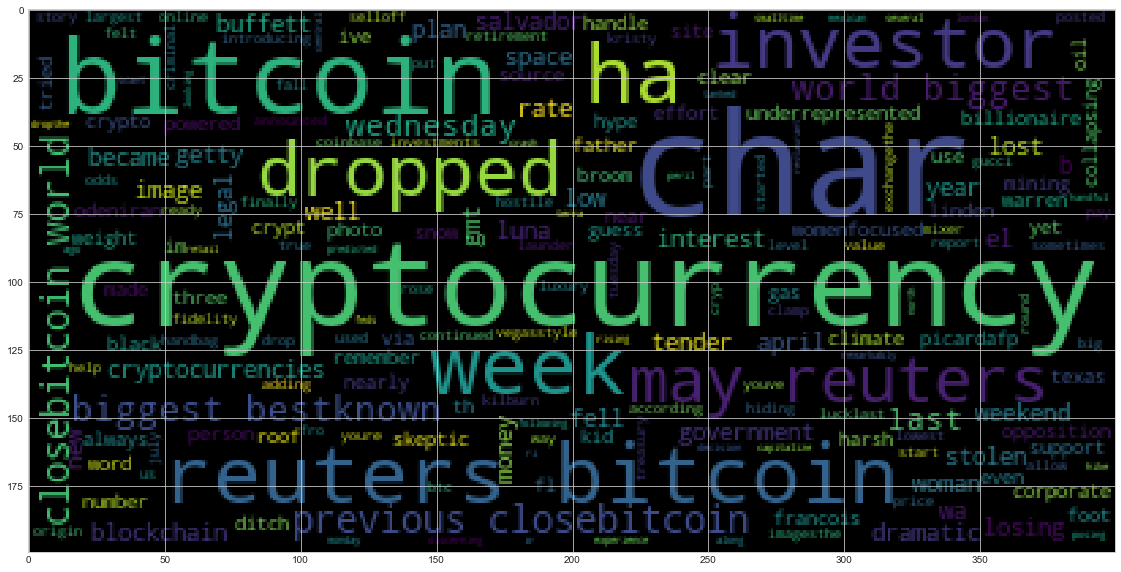

In [30]:
# Generate the Bitcoin word cloud
btc = [btc_article['content'] for btc_article in btc_news_articles["articles"]]
btc_big_string = ' '.join(btc) 
btc_string_token = tokenizer(btc_big_string,'B')

# Generate Word Cloud
btc_wc = WordCloud().generate(btc_string_token)
plt.imshow(btc_wc)

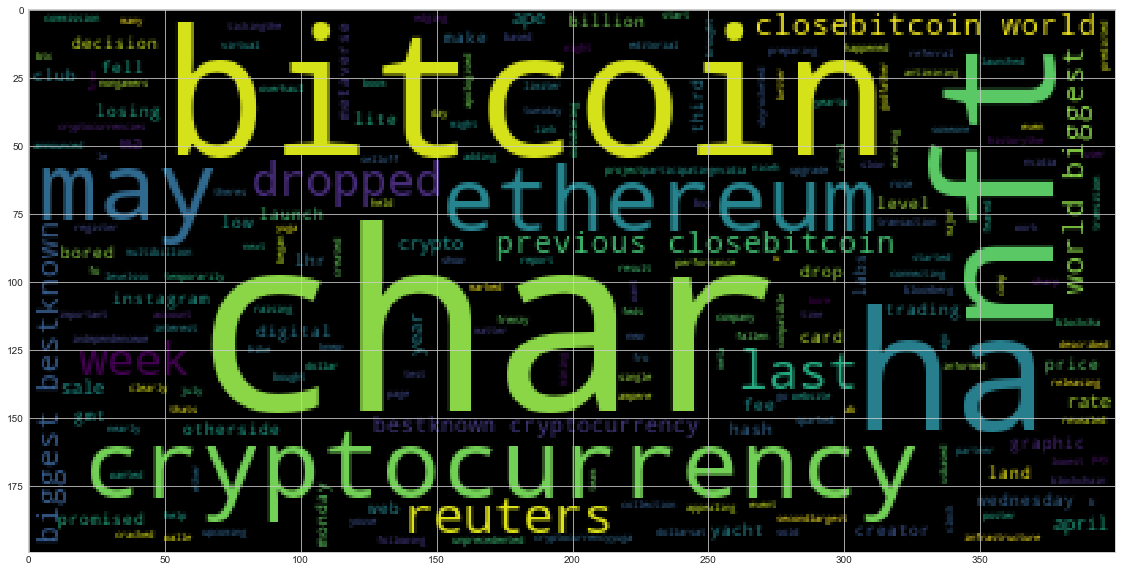

In [31]:
# Generate the Ethereum word cloud
eth = [eth_article['content'] for eth_article in eth_news_articles["articles"]]
eth_big_string = ' '.join(eth) 
eth_string_token = tokenizer(eth_big_string,'B')
eth_wc = WordCloud().generate(eth_string_token)
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [32]:
import spacy
from spacy import displacy

In [33]:
# Download the language model for SpaCy
#!python -m spacy download en_core_web_sm

In [34]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [35]:
# Concatenate all of the Bitcoin text together
#To be efficient reusing already concatenated Bitcoin text btc_big_string

In [36]:
# Run the NER processor on all of the text
btc_ner = nlp(btc_big_string)

# Add a title to the document
btc_ner.user_data['title'] = "Bitcoin Named Entity Recognition"

In [37]:
# Render the visualization
displacy.render(btc_ner, style='ent')

In [47]:
# List all Entities
btc_all_entities = [btc_ent.text for btc_ent in btc_ner.ents]
btc_all_entities

['Odeniran',
 'Linden',
 'Texas',
 'April 4th, 2022',
 'Photo',
 'FRANCOIS PICARD/AFP',
 'Getty Images',
 'Warren Buffett',
 'the weekend',
 'nearly three feet',
 'Getty Images\r\n',
 'the weekend',
 '34,000',
 '27,630',
 'Coinbase',
 '+2164',
 'Last week',
 'Fidelity Investments',
 'the US Treasury',
 'Bitcoin',
 'Gucci handbag',
 'week',
 'Kristy Kilburn',
 'May 11',
 'Reuters',
 '7.23%',
 '28,758.29',
 'GMT',
 'Wednesday',
 '2,241.68',
 '40.4%',
 'May 4',
 'Reuters',
 '5.7%',
 '39,862.84',
 'Wednesday',
 '2,102.94',
 '20.9%',
 'year',
 'April 26',
 'Reuters',
 '5.1%',
 '38,391.36',
 'Tuesday',
 '2,229.82',
 '16%',
 'year',
 'last July',
 '33,000',
 'the week',
 'last week',
 'Fed',
 'May 9',
 'Reuters',
 '7.81%',
 '31,333.41',
 'GMT',
 'Monday',
 '2,655.98',
 '35%',
 'Mexican',
 'North London',
 'a few weeks ago',
 '+2779',
 'May 10',
 'Reuters',
 'The Central African Republic',
 'second',
 'El Salvador',
 'Wednesday',
 'Faustin Archange',
 'Touadera',
 'two',
 "Seth Green's",
 'Nik

In [48]:
btc_gpe_org_entities = [btc_ent.text for btc_ent in btc_ner.ents if btc_ent.label_ in ['GPE', 'ORG']]
btc_gpe_org_entities

['Odeniran',
 'Linden',
 'Texas',
 'FRANCOIS PICARD/AFP',
 'Getty Images',
 'Getty Images\r\n',
 'Fidelity Investments',
 'the US Treasury',
 'Bitcoin',
 'Reuters',
 'Reuters',
 'Reuters',
 'Fed',
 'Reuters',
 'Reuters',
 'El Salvador',
 'Touadera',
 'Nike',
 'the digital asset exchange',
 'FTX',
 'El Salvador']

---

### Ethereum NER

In [39]:
# Concatenate all of the Ethereum text together
#To be efficient reusing already concatenated Ethereum text eth_big_string

In [40]:
# Run the NER processor on all of the text
eth_ner = nlp(eth_big_string)

# Add a title to the document
eth_ner.user_data['title'] = "Ethereum Named Entity Recognition"

In [41]:
# Render the visualization
displacy.render(eth_ner, style='ent')

In [46]:
# List all Entities
eth_entities = [eth_ent.text for eth_ent in eth_ner.ents if eth_ent.label_ in ['GPE', 'ORG']]
eth_entities

['Meta',
 'Instagram',
 'US',
 'Instagram',
 'Ethereum',
 'Yacht Club',
 'NFT',
 'Reuters',
 'Bloomberg',
 'LHR',
 'Ethereum',
 'Reuters',
 'Reuters',
 'Reuters',
 'Reuters',
 'NFT',
 'Ethereum',
 'Nvidia',
 'LHR',
 'Fed',
 'NFT',
 'ApeCoin',
 'Getty Images\r\n',
 'YouTuber']

---